In [35]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(Url)

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- We have to use Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived or not.

In [19]:
df = pd.read_csv(Url)
df.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Sex'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

x = pd.read_csv(Url)
x.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Survived','Sex'],axis=1,inplace=True)
x['Age'] = x[['Age','Pclass']].apply(impute_age,axis=1)
x

C:\Users\Akash\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


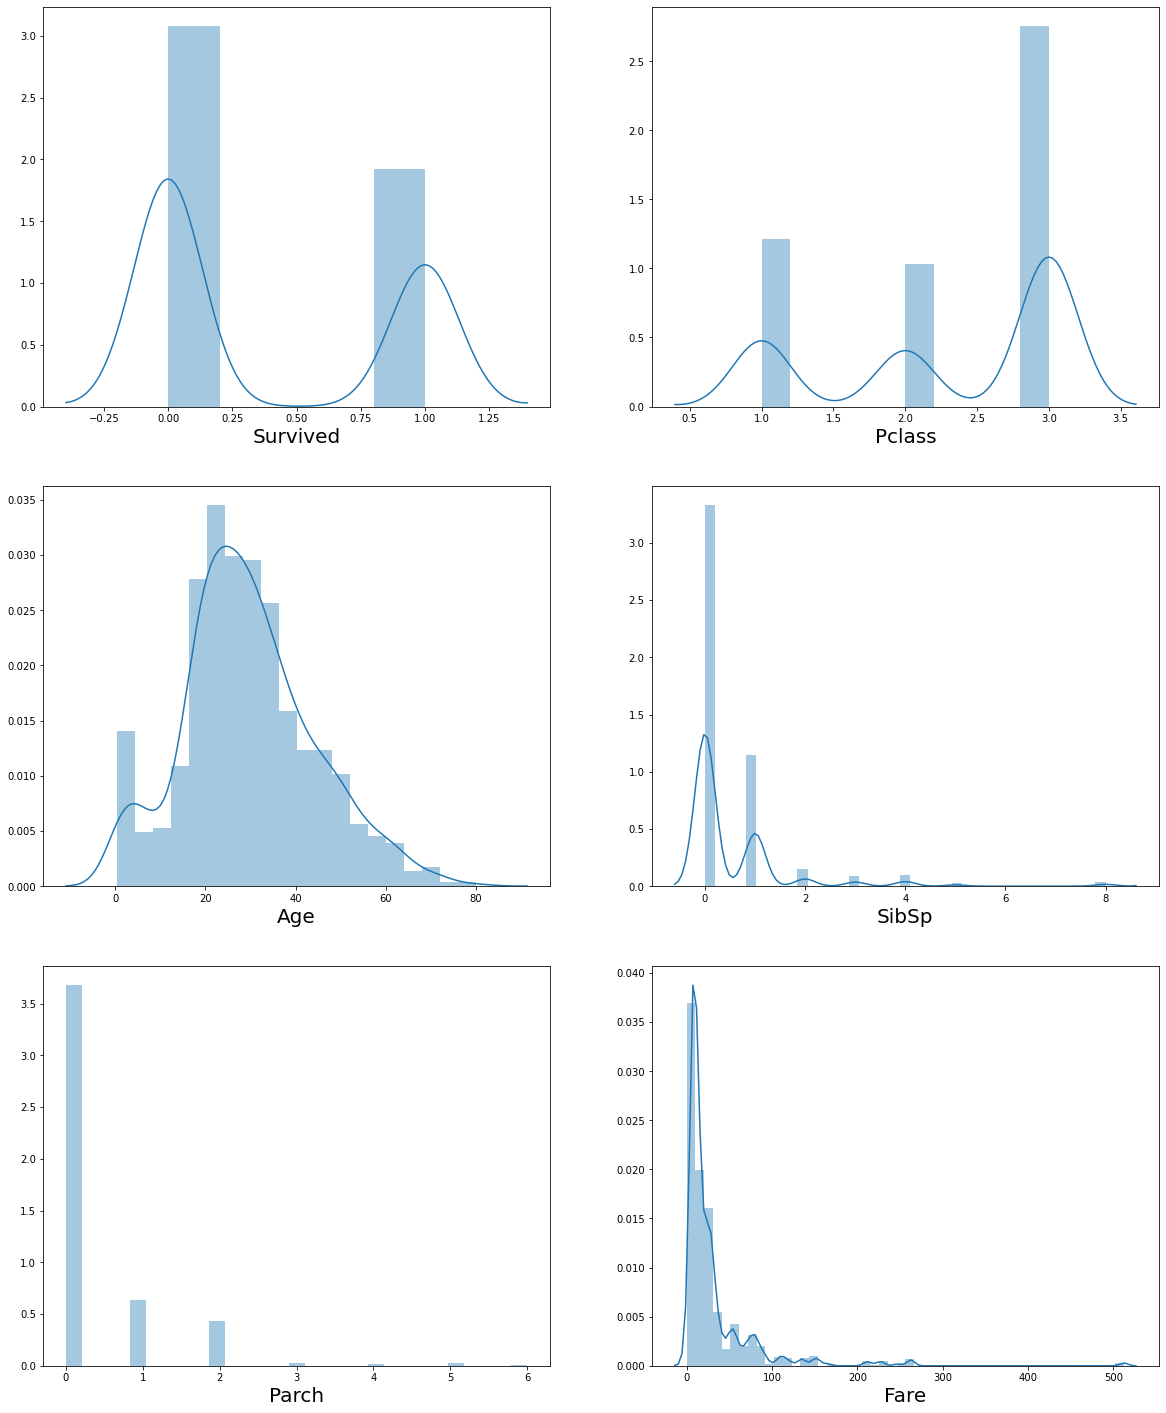

In [8]:
# let's see how data is distributed for every column
import seaborn as sns
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=6 :     # as there are 10 columns in the data
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [9]:
# Total number of people survived
a = titanic['Survived'].sum()
a

342

In [10]:
# Total number of people not able to survived 
b = titanic['Survived'].count()
b-a

549

### Missing values
- Missing values of the age column are replaced by mean with respect to each of the passenger classes. 

In [11]:
p = titanic.groupby('Pclass')['Age'].mean()
p

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return round(p[1])
        elif Pclass == 2:
            return round(p[2])
        else:
            return round(p[3])
    else:
        return Age

In [20]:
df.drop(['Survived'],axis=1,inplace=True)
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
df = pd.concat([df,sex],axis=1)
df

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1
887,1,19.0,0,0,30.0000,0
888,3,25.0,1,2,23.4500,0
889,1,26.0,0,0,30.0000,1


In [23]:
df.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
dtype: int64

In [21]:
X = df.to_numpy()
X

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 25.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

### Variance Inflation factor (for checking multicollinearity)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = df.columns
vif

,VIF,Features
0,4.399494,Pclass
1,4.050909,Age
2,1.561470,SibSp
3,1.601607,Parch
4,1.685356,Fare
5,3.046108,male


All the VIF values are less than 5. That means there is no multicollinearity. 
Now, we can go ahead with fitting our data to the model.
But before that, we need to encode the sex column to Male.

### Encoding categorical data ('Sex' column)

In [25]:
y = titanic['Sex']
y

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state= 0)

### Decision tree classification (without hyper-parameter tuning) 

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
clf.score(x_train,y_train)

1.0

In [31]:
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)

1.0

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 83,   0],
       [  0, 140]], dtype=int64)

This decision tree is giving 100% accuracy. 

### Decision tree classification (with some of the hyper-parameters tuning) 

In [33]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [36]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [37]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [38]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [39]:
grid_search.best_score_

1.0

### Decision tree (with criterion as 'entropy', max_depth=24 and splitter='random') 

In [40]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24, splitter='random')

In [41]:
clf.score(x_test,y_test)

1.0